In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imbtools.evaluation import BinaryExperiment

In [3]:
parameters_range = {
    "n_classes": [2],
    "class_sep": [2], 
    "n_clusters_per_class": [2, 3, 4, 5], 
    "weights": [[0.95, 0.05], [0.85, 0.15], [0.90, 0.10], [0.92, 0.08], [0.87, 0.13], [0.98, 0.02]], 
    "n_samples": [5000], 
    "n_features": [5, 10, 50, 100], 
    "n_redundant": [0],
    "n_informative":[5],
    "random_state": [5]
}

datasets_parameters = [dict(zip(parameters_range.keys(), parameter_product)) for parameter_product in product(*parameters_range.values())]

In [4]:
imbalanced_datasets = []
for parameters in datasets_parameters:
    imbalanced_datasets.append(make_classification(**parameters))

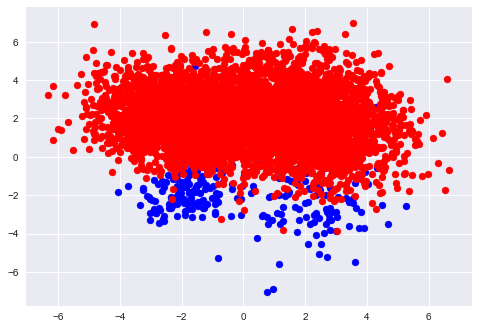

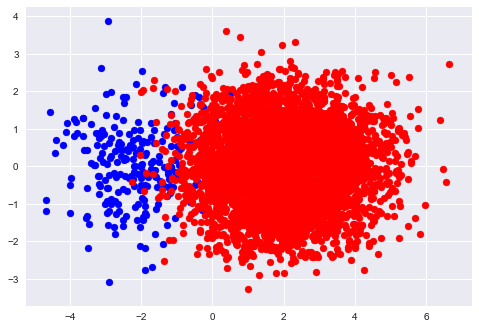

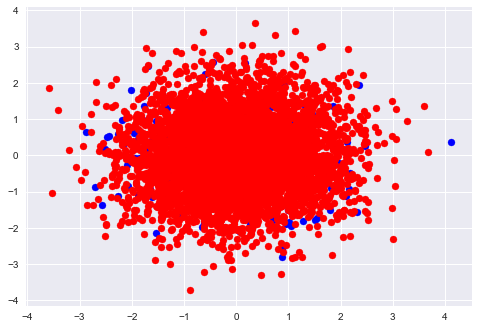

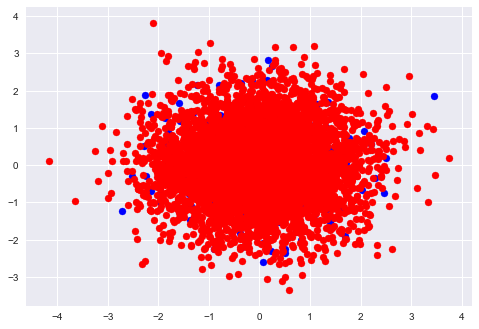

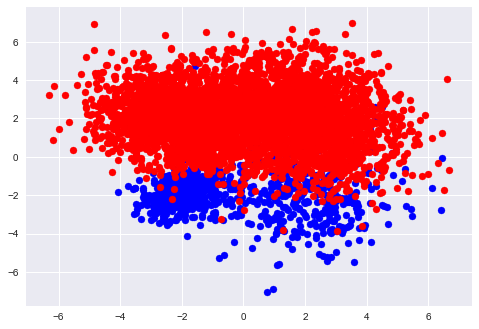

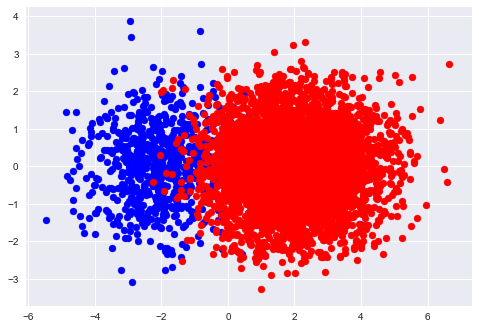

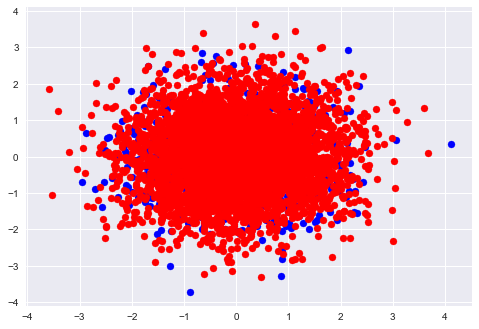

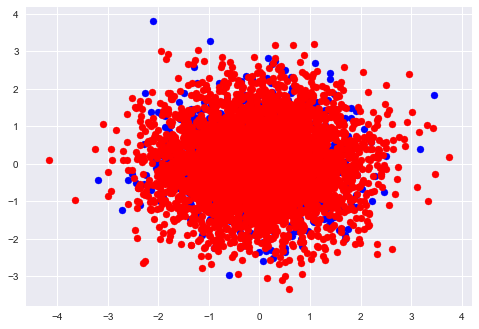

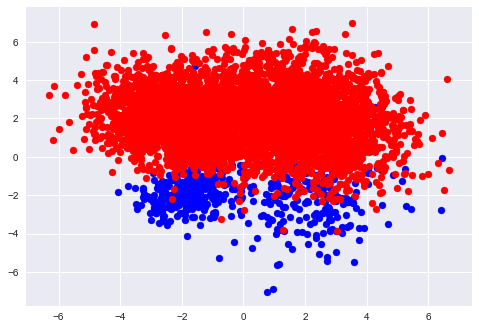

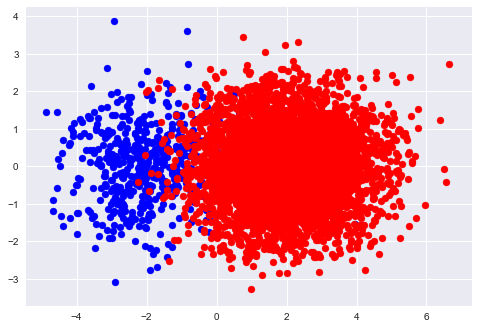

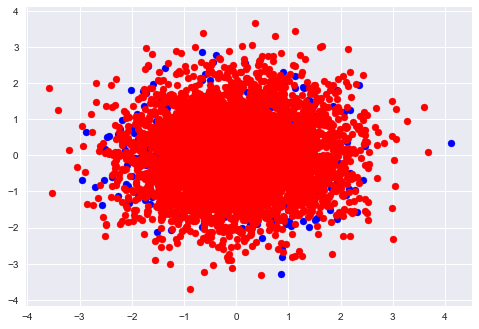

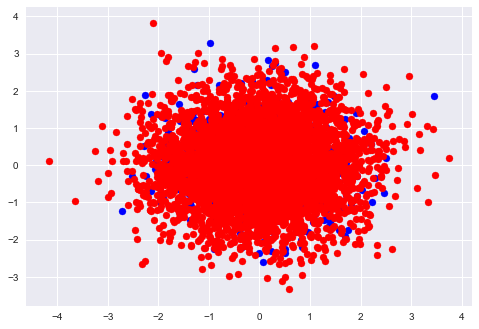

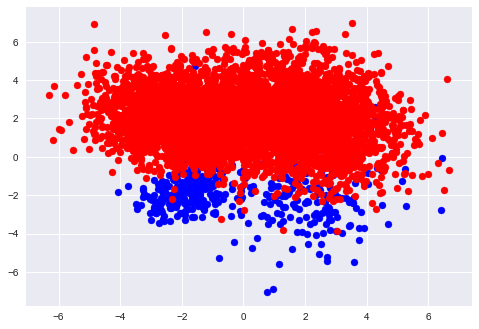

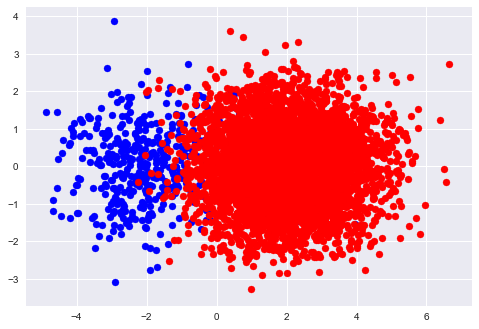

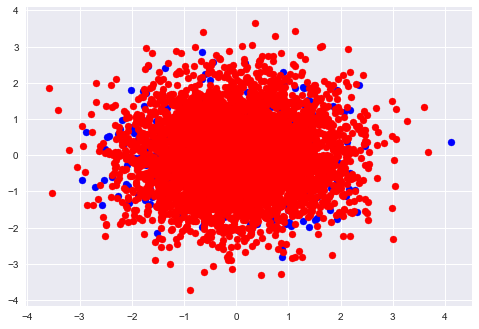

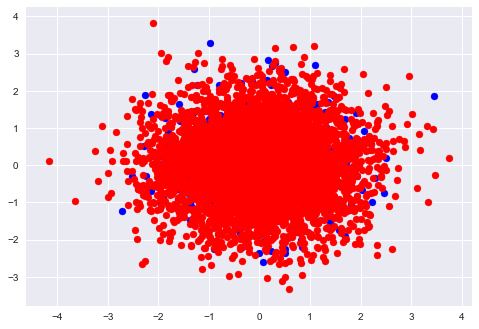

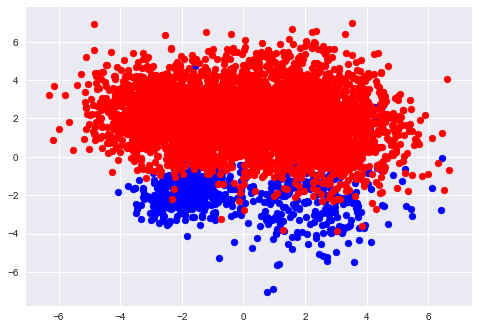

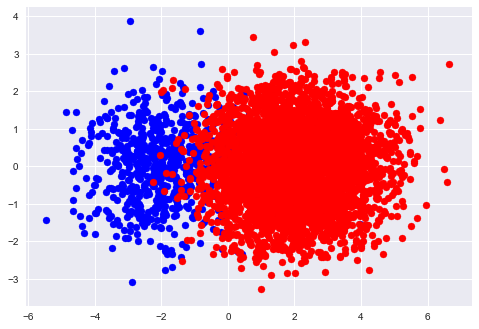

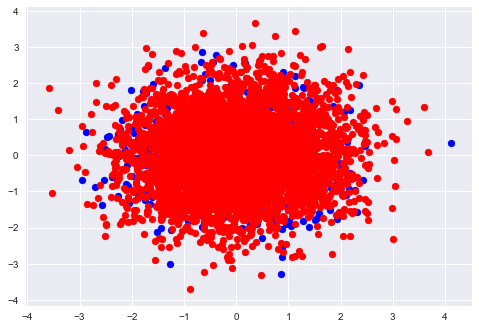

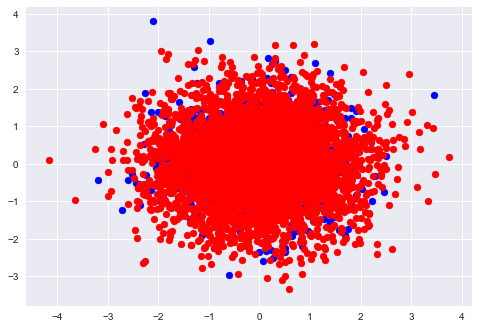

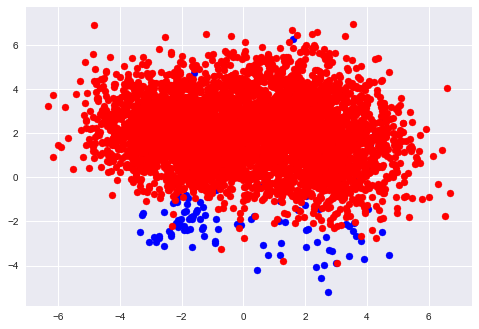

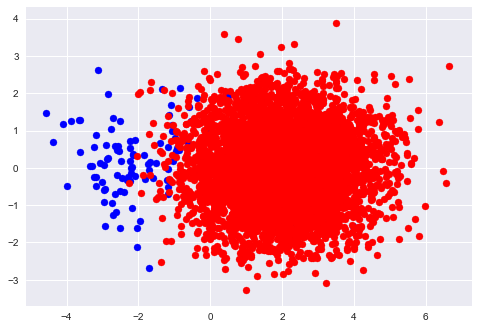

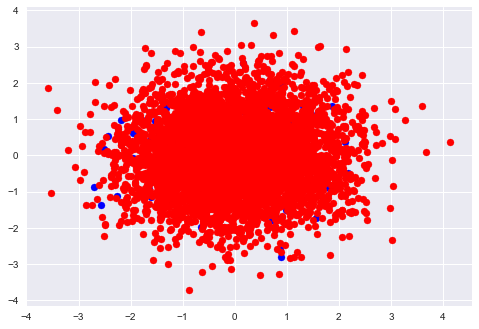

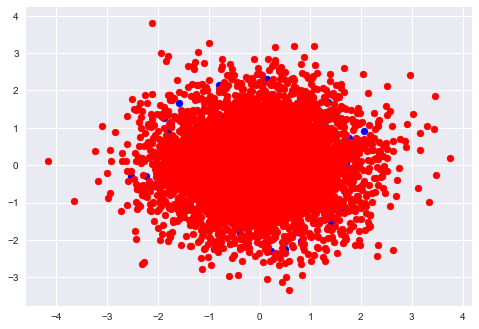

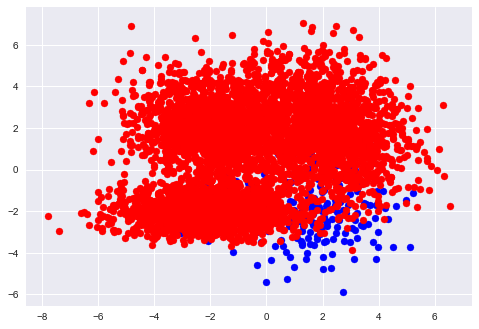

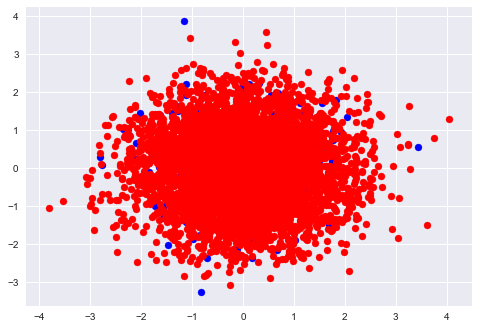

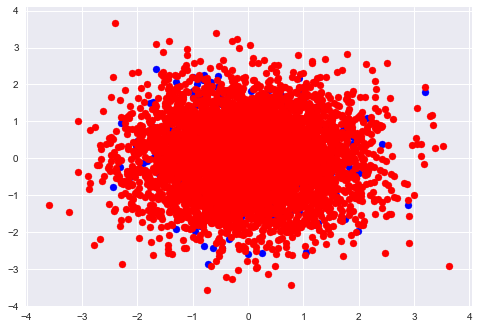

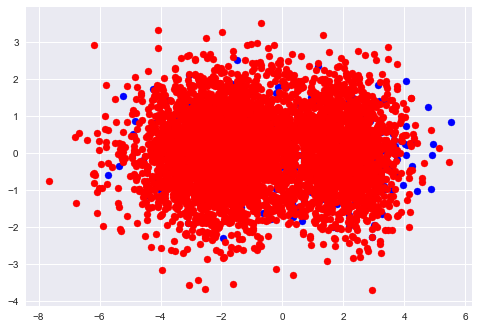

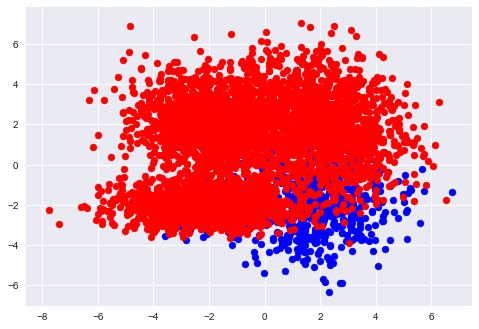

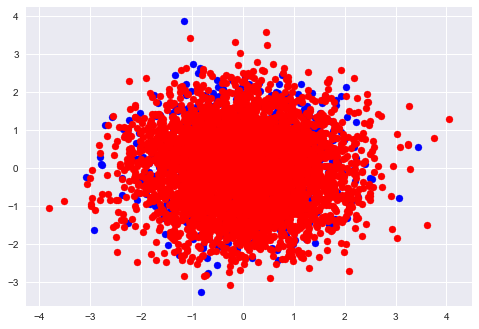

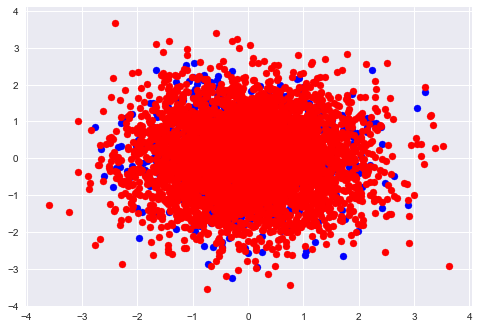

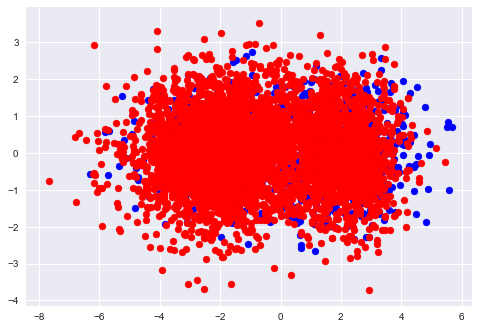

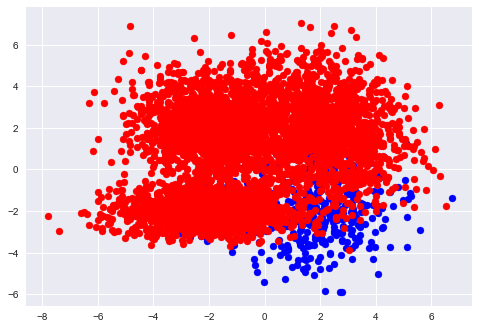

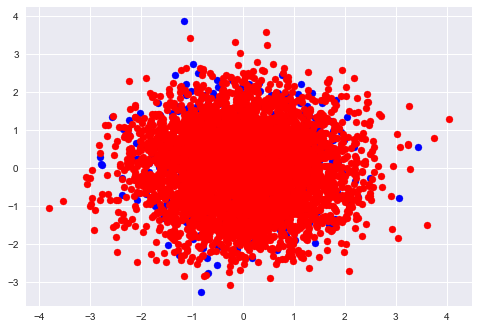

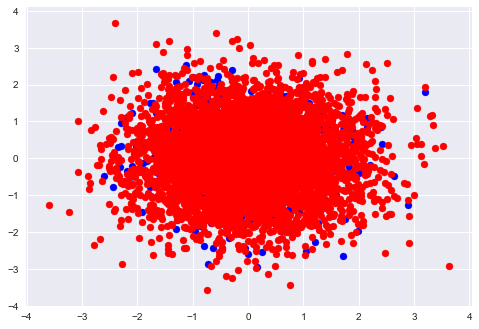

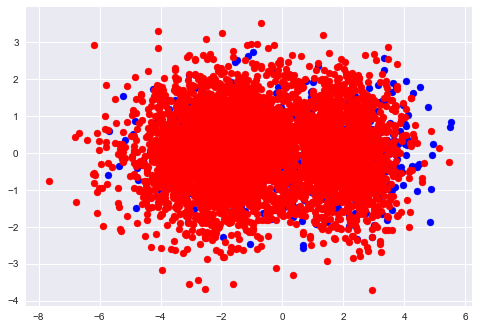

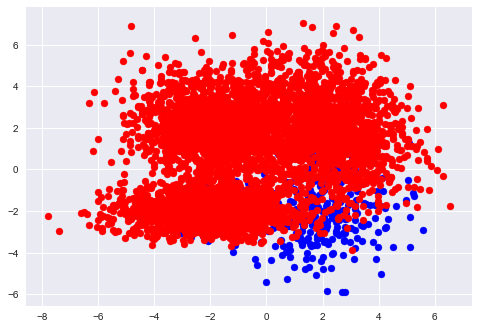

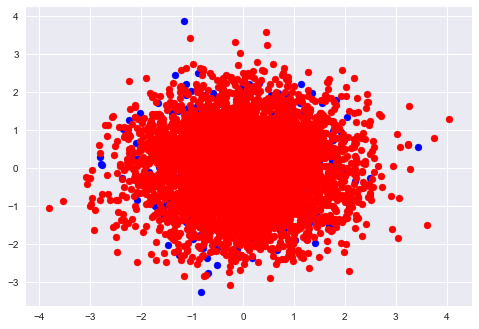

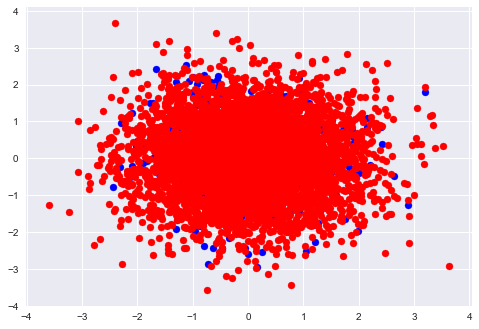

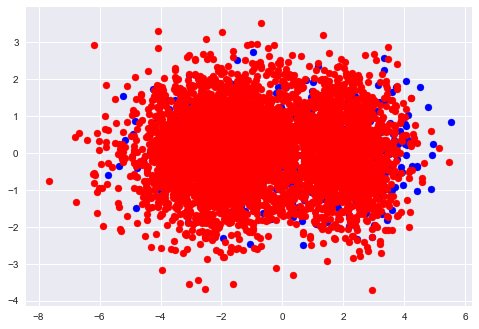

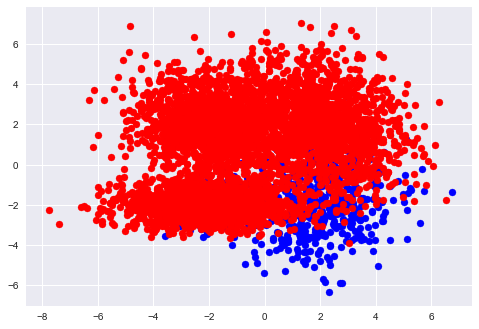

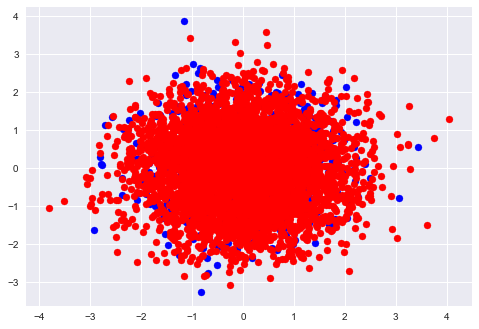

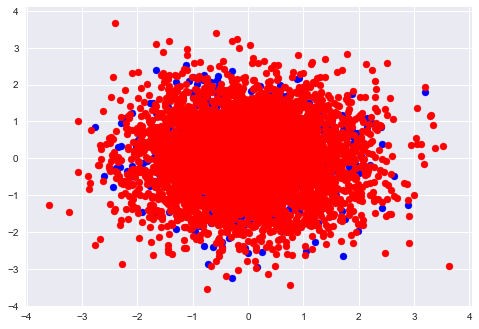

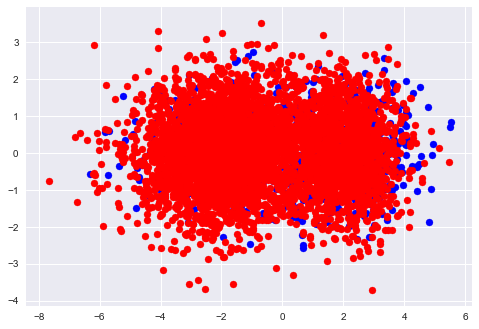

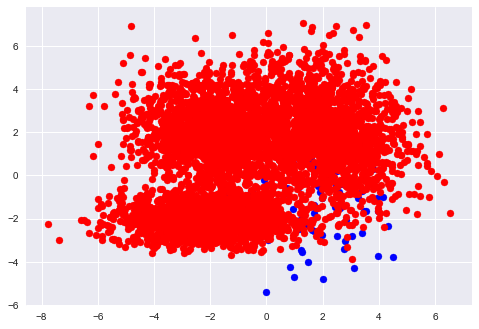

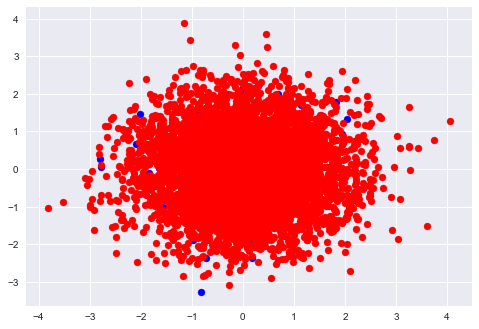

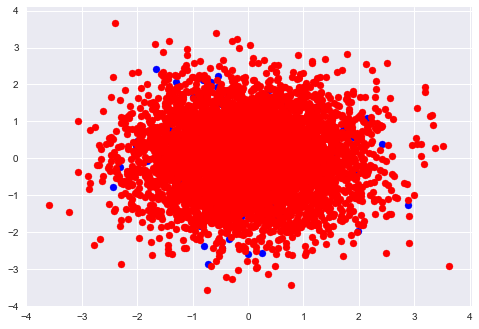

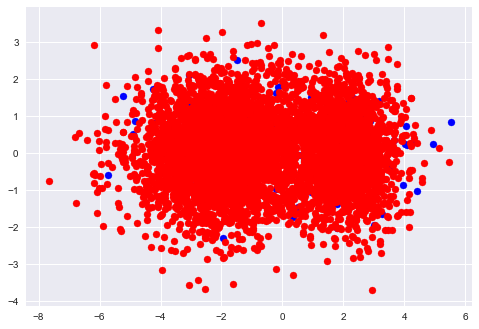

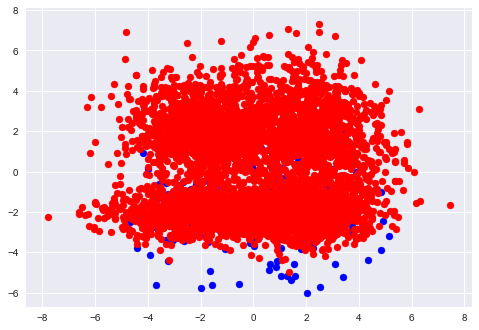

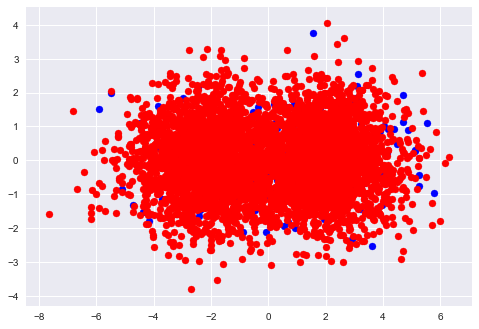

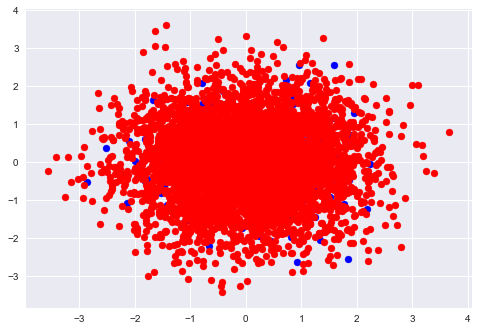

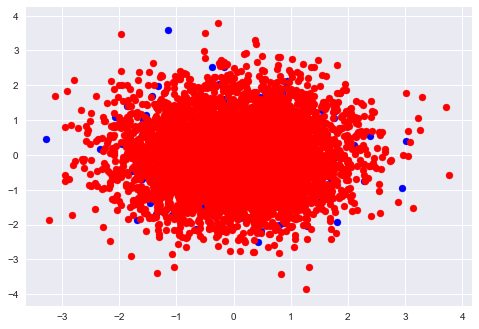

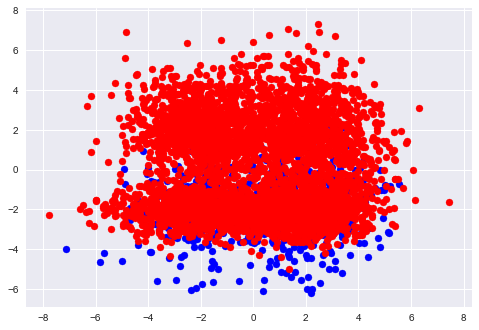

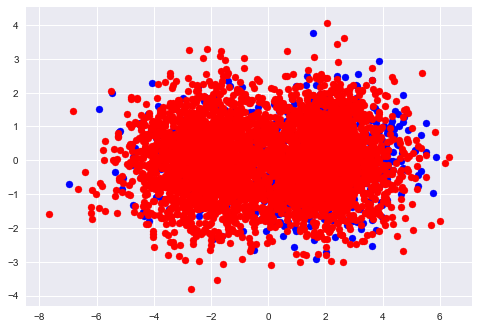

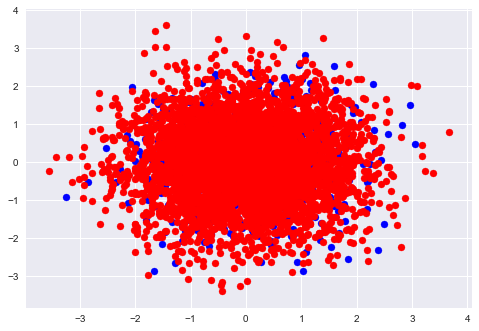

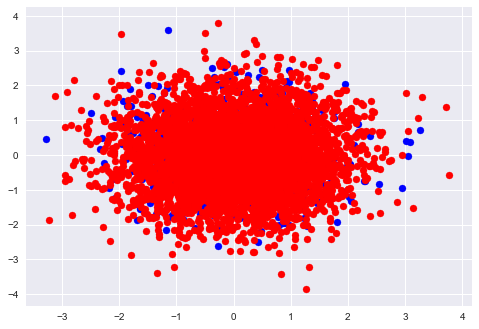

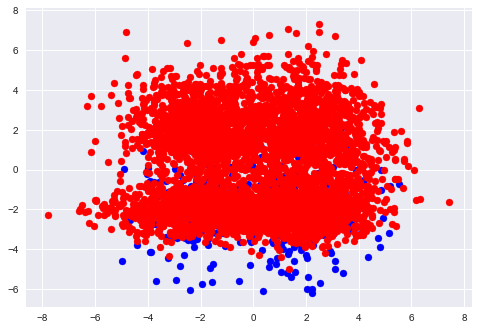

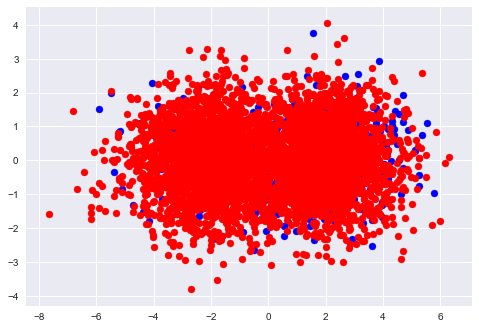

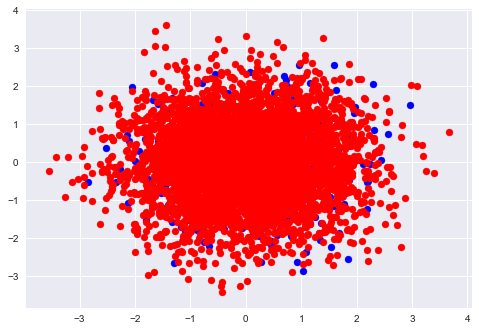

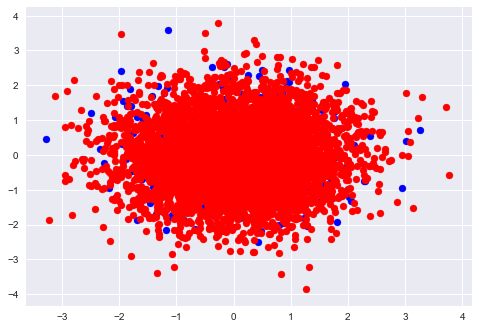

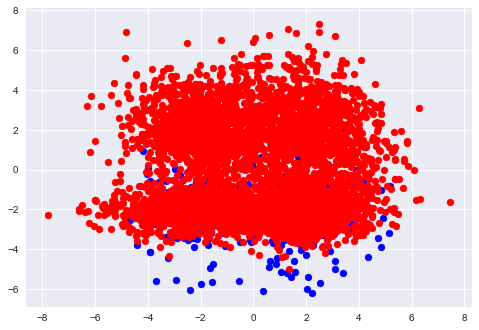

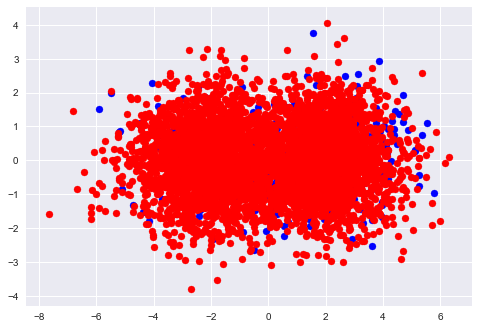

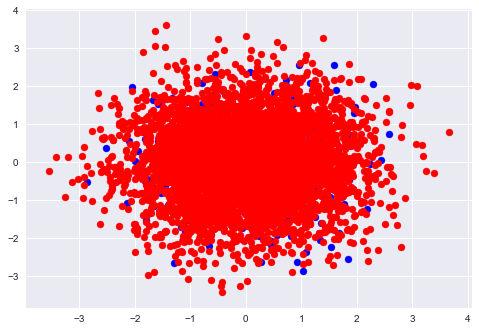

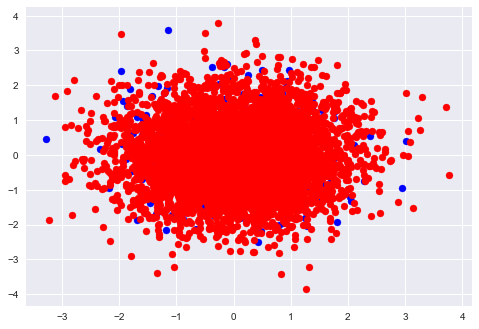

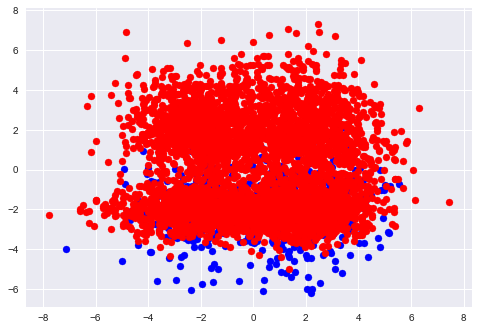

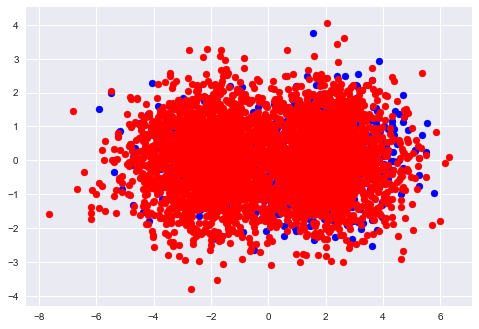

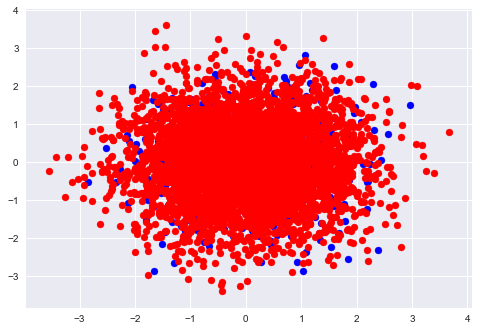

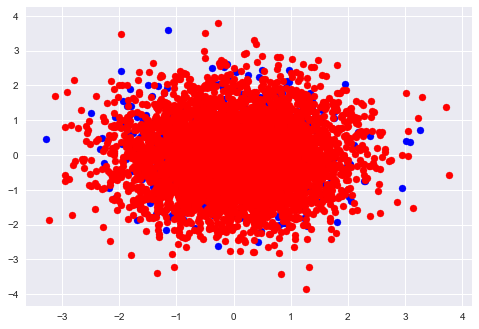

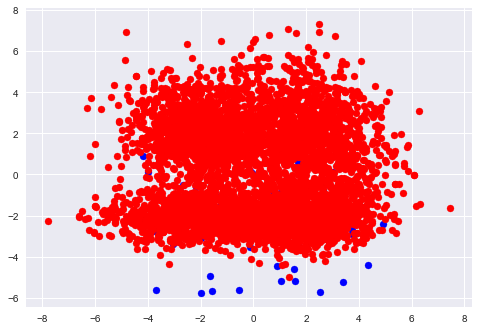

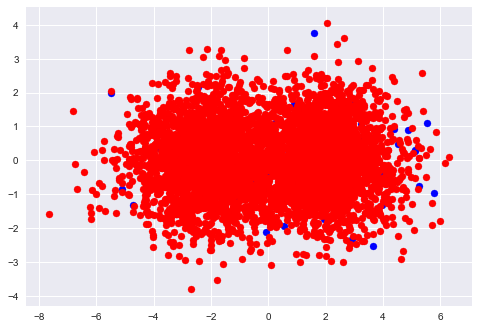

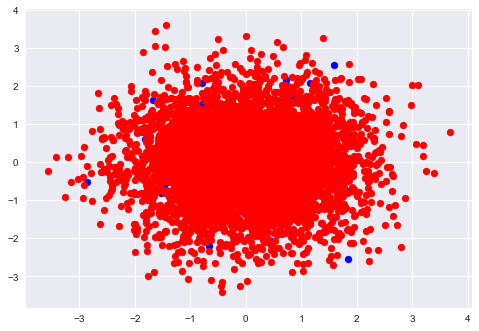

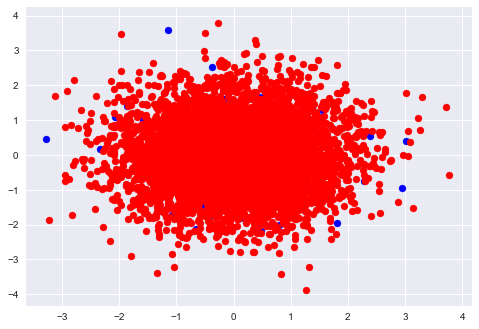

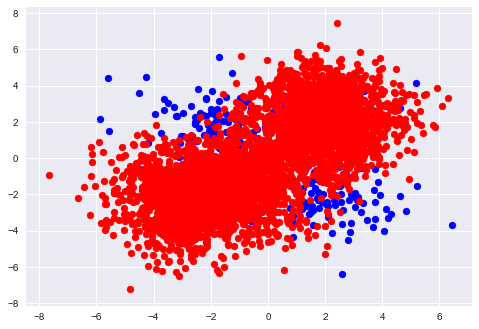

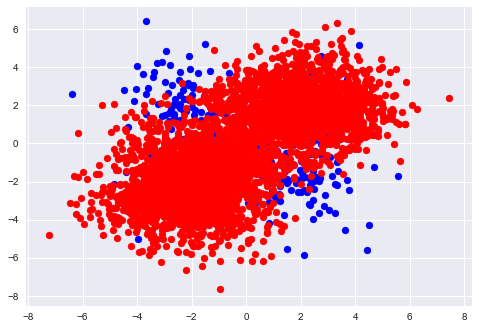

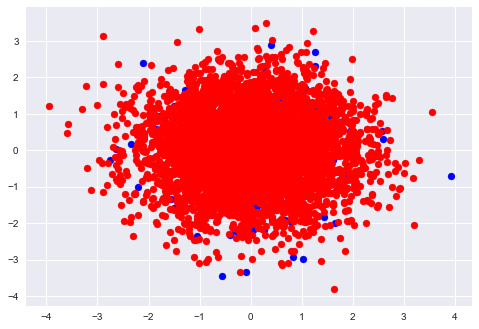

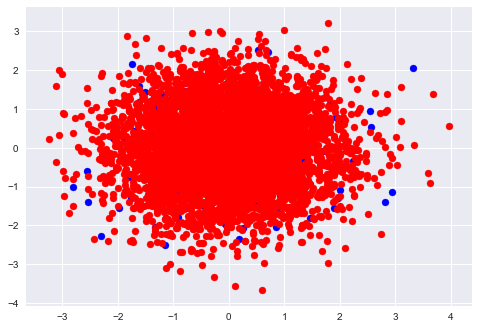

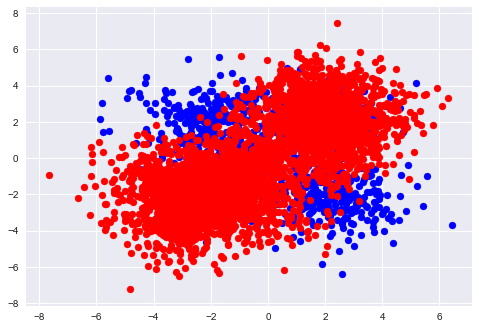

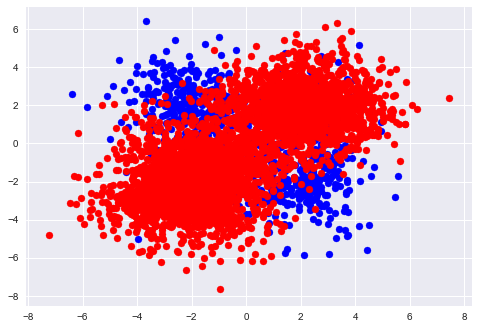

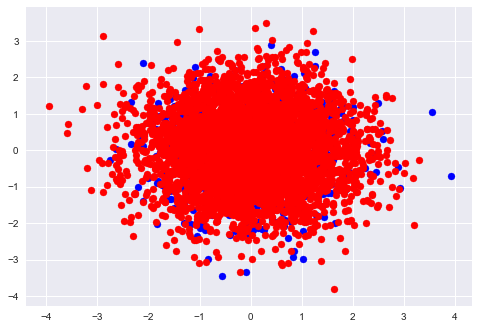

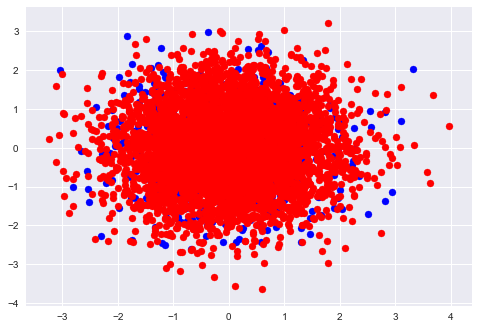

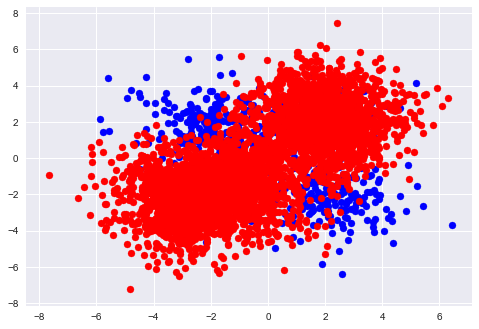

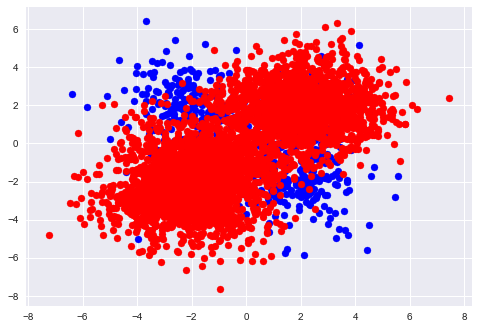

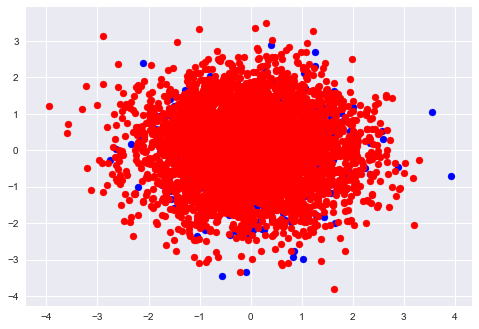

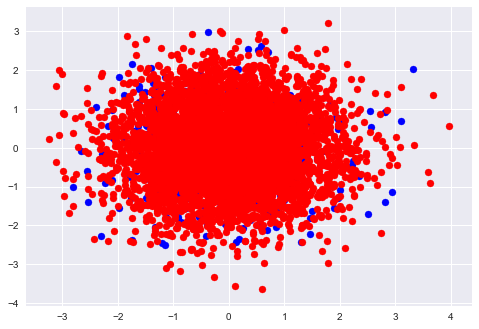

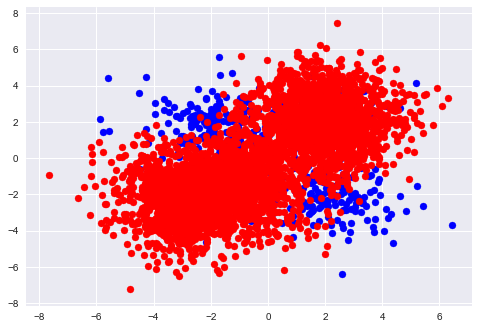

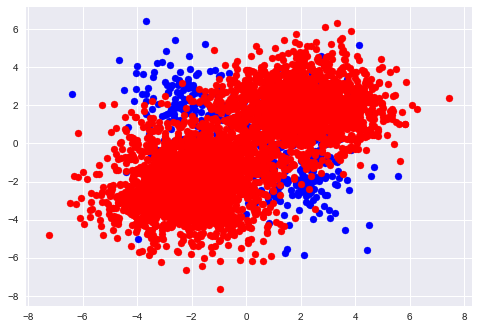

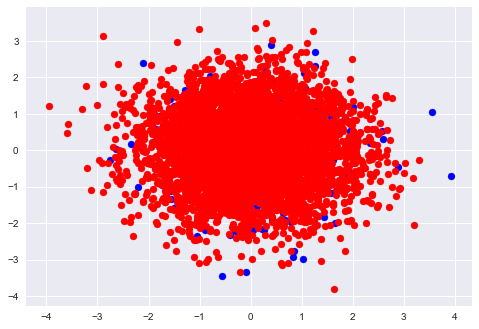

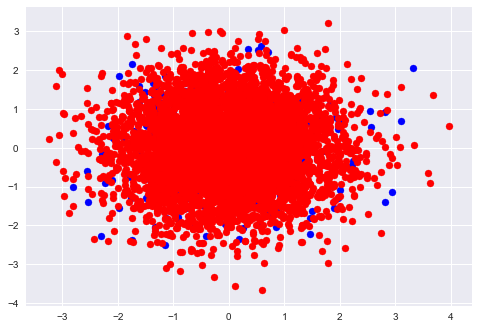

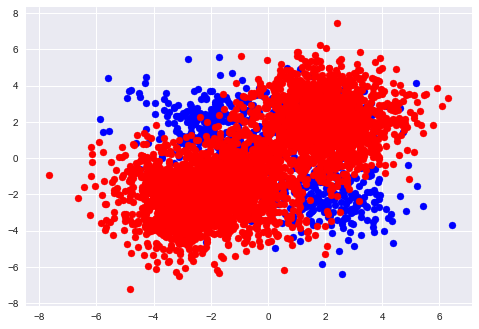

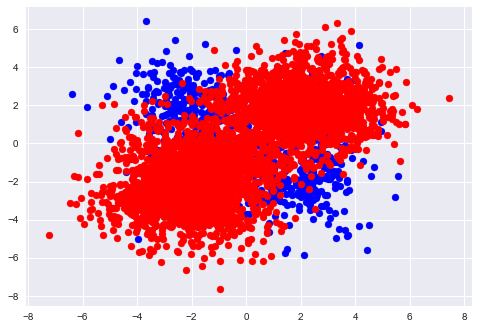

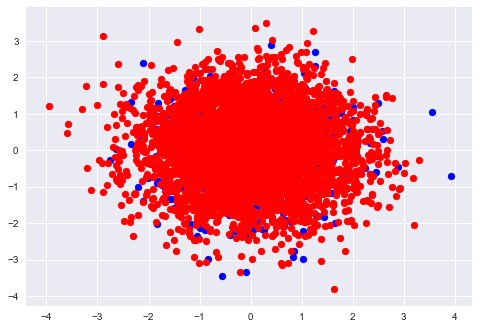

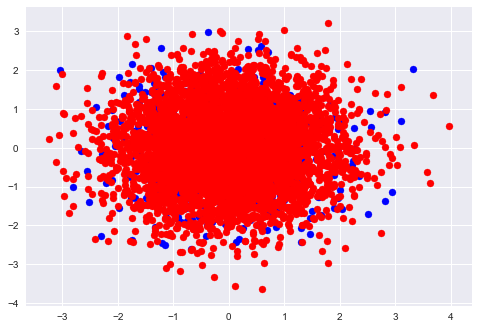

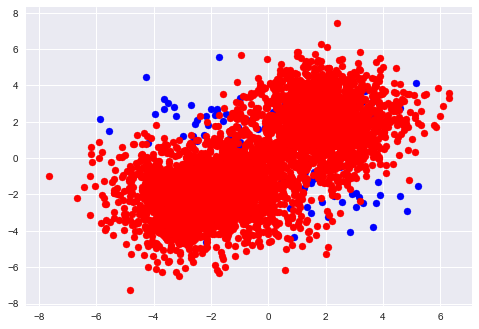

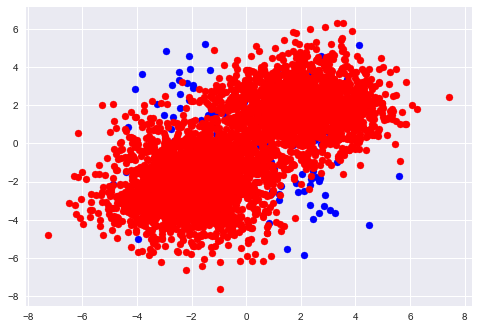

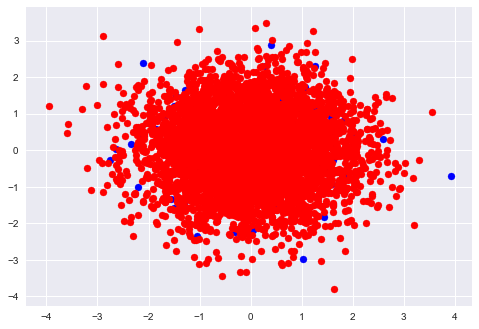

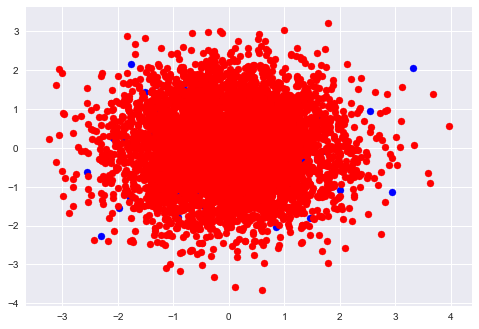

In [5]:
sns.set()
for imbalanced_dataset in imbalanced_datasets:
    X, y = imbalanced_dataset
    minority_indices = (y == 1)
    p = plt.scatter(X[minority_indices, 0], X[minority_indices, 1], color="blue")
    p = plt.scatter(X[~minority_indices, 0], X[~minority_indices, 1], color="red")
    plt.show()

In [6]:
oversampling_methods = [None, RandomOverSampler(), SMOTE(), SMOTE(kind='borderline1'), SMOTE(kind='borderline2'), ADASYN()]
classifiers = [LogisticRegression()]

In [7]:
experiment = BinaryExperiment(imbalanced_datasets, classifiers, oversampling_methods)

In [8]:
experiment.run(logging_results=False)

100% (8640 of 8640) |#####################| Elapsed Time: 8:11:46 ETA:  0:00:00

In [9]:
experiment.datasets_summary_

Dataset name  # of features  # of instances  # of minority instances  \
0     dataset_1              5            5000                      265   
1     dataset_2             10            5000                      271   
2     dataset_3             50            5000                      269   
3     dataset_4            100            5000                      274   
4     dataset_5              5            5000                      759   
5     dataset_6             10            5000                      764   
6     dataset_7             50            5000                      763   
7     dataset_8            100            5000                      769   
8     dataset_9              5            5000                      513   
9    dataset_10             10            5000                      516   
10   dataset_11             50            5000                      514   
11   dataset_12            100            5000                      523   
12   dataset_13              5            5000                      414   
13   dataset_14             10            5000                      418   
14   dataset_15             50            5000                      415   
15   dataset_16            100            5000                      424   
16   dataset_17              5            5000                      660   
17   dataset_18             10            5000                      665   
18   dataset_19             50            5000                      663   
19   dataset_20            100            5000                      671   
20   dataset_21              5            5000                      117   
21   dataset_22             10            5000                      121   
22   dataset_23             50            5000                      123   
23   dataset_24            100            5000                      125   
24   dataset_25              5            5000                      266   
25   dataset_26             10            5000                      266   
26   dataset_27             50            5000                      281   
27   dataset_28            100            5000                      276   
28   dataset_29              5            5000                      762   
29   dataset_30             10            5000                      762   
..          ...            ...             ...                      ...   
66   dataset_67             50            5000                      675   
67   dataset_68            100            5000                      674   
68   dataset_69              5            5000                      118   
69   dataset_70             10            5000                      119   
70   dataset_71             50            5000                      132   
71   dataset_72            100            5000                      131   
72   dataset_73              5            5000                      272   
73   dataset_74             10            5000                      274   
74   dataset_75             50            5000                      274   
75   dataset_76            100            5000                      281   
76   dataset_77              5            5000                      770   
77   dataset_78             10            5000                      767   
78   dataset_79             50            5000                      769   
79   dataset_80            100            5000                      778   
80   dataset_81              5            5000                      520   
81   dataset_82             10            5000                      518   
82   dataset_83             50            5000                      520   
83   dataset_84            100            5000                      530   
84   dataset_85              5            5000                      420   
85   dataset_86             10            5000                      419   
86   dataset_87             50            5000                      421   
87   dataset_88            1

In [10]:
experiment.mean_cv_results_

Dataset          Classifier Oversampling method  \
0      dataset_1  LogisticRegression              ADASYN   
1      dataset_1  LogisticRegression              ADASYN   
2      dataset_1  LogisticRegression              ADASYN   
3      dataset_1  LogisticRegression                None   
4      dataset_1  LogisticRegression                None   
5      dataset_1  LogisticRegression                None   
6      dataset_1  LogisticRegression   RandomOverSampler   
7      dataset_1  LogisticRegression   RandomOverSampler   
8      dataset_1  LogisticRegression   RandomOverSampler   
9      dataset_1  LogisticRegression               SMOTE   
10     dataset_1  LogisticRegression               SMOTE   
11     dataset_1  LogisticRegression               SMOTE   
12     dataset_1  LogisticRegression              SMOTE2   
13     dataset_1  LogisticRegression              SMOTE2   
14     dataset_1  LogisticRegression              SMOTE2   
15     dataset_1  LogisticRegression              SMOTE3   
16     dataset_1  LogisticRegression              SMOTE3   
17     dataset_1  LogisticRegression              SMOTE3   
18    dataset_10  LogisticRegression              ADASYN   
19    dataset_10  LogisticRegression              ADASYN   
20    dataset_10  LogisticRegression              ADASYN   
21    dataset_10  LogisticRegression                None   
22    dataset_10  LogisticRegression                None   
23    dataset_10  LogisticRegression                None   
24    dataset_10  LogisticRegression   RandomOverSampler   
25    dataset_10  LogisticRegression   RandomOverSampler   
26    dataset_10  LogisticRegression   RandomOverSampler   
27    dataset_10  LogisticRegression               SMOTE   
28    dataset_10  LogisticRegression               SMOTE   
29    dataset_10  LogisticRegression               SMOTE   
...          ...                 ...                 ...   
1698  dataset_95  LogisticRegression   RandomOverSampler   
1699  dataset_95  LogisticRegression   RandomOverSampler   
1700  dataset_95  LogisticRegression   RandomOverSampler   
1701  dataset_95  LogisticRegression               SMOTE   
1702  dataset_95  LogisticRegression               SMOTE   
1703  dataset_95  LogisticRegression               SMOTE   
1704  dataset_95  LogisticRegression              SMOTE2   
1705  dataset_95  LogisticRegression              SMOTE2   
1706  dataset_95  LogisticRegression              SMOTE2   
1707  dataset_95  LogisticRegression              SMOTE3   
1708  dataset_95  LogisticRegression              SMOTE3   
1709  dataset_95  LogisticRegression              SMOTE3   
1710  dataset_96  LogisticRegression              ADASYN   
1711  dataset_96  LogisticRegression              ADASYN   
1712  dataset_96  LogisticRegression              ADASYN   
1713  dataset_96  LogisticRegression                None   
1714  dataset_96  LogisticRegression                None   
1715  dataset_96  LogisticRegression                None   
1716  dataset_96  LogisticRegression   RandomOverSampler   
1717  dataset_96  LogisticRegression   RandomOverSampler   
1718  dataset_96  LogisticRegression   RandomOverSampler   
1719  dataset_96  LogisticRegression               SMOTE   
1720  dataset_96  LogisticRegression               SMOTE   
1721  dataset_96  LogisticRegression               SMOTE   
1722  dataset_96  LogisticRegression              SMOTE2   
1723  dataset_96  LogisticRegression              SMOTE2   
1724  dataset_96  LogisticRegression              SMOTE2   
1725  dataset_96  LogisticRegression              SMOTE3   
1726  dataset_96  LogisticRegression              SMOTE3   
1727  dataset_96  LogisticRegression              SMOTE3   

                    Metric  Mean CV score  
0                 f1 score       0.237078  
1     geometric mean score       0.799439  
2            roc auc score       0.955851  
3                 f1 score       0.952023  
4     geometric mean score       0.962758  
5            roc auc sco

In [11]:
experiment.std_cv_results_

Dataset          Classifier Oversampling method  \
0      dataset_1  LogisticRegression              ADASYN   
1      dataset_1  LogisticRegression              ADASYN   
2      dataset_1  LogisticRegression              ADASYN   
3      dataset_1  LogisticRegression                None   
4      dataset_1  LogisticRegression                None   
5      dataset_1  LogisticRegression                None   
6      dataset_1  LogisticRegression   RandomOverSampler   
7      dataset_1  LogisticRegression   RandomOverSampler   
8      dataset_1  LogisticRegression   RandomOverSampler   
9      dataset_1  LogisticRegression               SMOTE   
10     dataset_1  LogisticRegression               SMOTE   
11     dataset_1  LogisticRegression               SMOTE   
12     dataset_1  LogisticRegression              SMOTE2   
13     dataset_1  LogisticRegression              SMOTE2   
14     dataset_1  LogisticRegression              SMOTE2   
15     dataset_1  LogisticRegression              SMOTE3   
16     dataset_1  LogisticRegression              SMOTE3   
17     dataset_1  LogisticRegression              SMOTE3   
18    dataset_10  LogisticRegression              ADASYN   
19    dataset_10  LogisticRegression              ADASYN   
20    dataset_10  LogisticRegression              ADASYN   
21    dataset_10  LogisticRegression                None   
22    dataset_10  LogisticRegression                None   
23    dataset_10  LogisticRegression                None   
24    dataset_10  LogisticRegression   RandomOverSampler   
25    dataset_10  LogisticRegression   RandomOverSampler   
26    dataset_10  LogisticRegression   RandomOverSampler   
27    dataset_10  LogisticRegression               SMOTE   
28    dataset_10  LogisticRegression               SMOTE   
29    dataset_10  LogisticRegression               SMOTE   
...          ...                 ...                 ...   
1698  dataset_95  LogisticRegression   RandomOverSampler   
1699  dataset_95  LogisticRegression   RandomOverSampler   
1700  dataset_95  LogisticRegression   RandomOverSampler   
1701  dataset_95  LogisticRegression               SMOTE   
1702  dataset_95  LogisticRegression               SMOTE   
1703  dataset_95  LogisticRegression               SMOTE   
1704  dataset_95  LogisticRegression              SMOTE2   
1705  dataset_95  LogisticRegression              SMOTE2   
1706  dataset_95  LogisticRegression              SMOTE2   
1707  dataset_95  LogisticRegression              SMOTE3   
1708  dataset_95  LogisticRegression              SMOTE3   
1709  dataset_95  LogisticRegression              SMOTE3   
1710  dataset_96  LogisticRegression              ADASYN   
1711  dataset_96  LogisticRegression              ADASYN   
1712  dataset_96  LogisticRegression              ADASYN   
1713  dataset_96  LogisticRegression                None   
1714  dataset_96  LogisticRegression                None   
1715  dataset_96  LogisticRegression                None   
1716  dataset_96  LogisticRegression   RandomOverSampler   
1717  dataset_96  LogisticRegression   RandomOverSampler   
1718  dataset_96  LogisticRegression   RandomOverSampler   
1719  dataset_96  LogisticRegression               SMOTE   
1720  dataset_96  LogisticRegression               SMOTE   
1721  dataset_96  LogisticRegression               SMOTE   
1722  dataset_96  LogisticRegression              SMOTE2   
1723  dataset_96  LogisticRegression              SMOTE2   
1724  dataset_96  LogisticRegression              SMOTE2   
1725  dataset_96  LogisticRegression              SMOTE3   
1726  dataset_96  LogisticRegression              SMOTE3   
1727  dataset_96  LogisticRegression              SMOTE3   

                    Metric  Std CV score  
0                 f1 score      0.005628  
1     geometric mean score      0.003232  
2            roc auc score      0.011854  
3                 f1 score      0.001736  
4     geometric mean score      0.002017  
5            roc auc score    

In [12]:
experiment.mean_ranking_results_

ADASYN  None  RandomOverSampler  \
Classifier         Metric                                                  
LogisticRegression f1 score                5.90  1.00               3.70   
                   geometric mean score    5.38  4.32               2.49   
                   roc auc score           5.60  1.79               2.83   

                                         SMOTE  SMOTE2  SMOTE3  
Classifier         Metric                                       
LogisticRegression f1 score               2.65    3.16    4.60  
                   geometric mean score   2.15    2.96    3.71  
                   roc auc score          2.92    3.65    4.21

In [13]:
experiment.friedman_test_results_

p-value
Classifier         Metric                            
LogisticRegression f1 score              2.249065e-81
                   geometric mean score  8.121625e-42
                   roc auc score         2.831073e-49